# 0. Setup

Import packages and specify any important functions here.

In [14]:
# import standard python packages
import pandas as pd
import subprocess
import os
import dill
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

# add the utils and env directories to the path
import sys
sys.path.append('../../utils/')
sys.path.append('../../env/')

# import functions from utils directory files
from string_functions import *
from biofile_handling import *
from scanpy_wrappers import *

# import paths to software installs from env
from install_locs import *

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [15]:
################
# general info #
################

# Specify the name of the species folder in Amazon S3
species = 'Mus_musculus'

# Specify any particular identifying conditions, eg tissue type:
conditions = 'adultbrain'

################

species_prefix = prefixify(species)

# Specify folder as destination for file downloads
output_folder = '../../output/' + prefixify(species) + '_' + conditions + '/'

if not os.path.exists(output_folder):
    os.mkdir(output_folder)
    
species_SampleDict = SampleDict(species, conditions, output_folder)
species_BioFileDocket = BioFileDocket(species_SampleDict).unpickle()

In [16]:
gxc = pd.read_csv(species_BioFileDocket.gxc.path, sep = '\t')
display(gxc)
exc = pd.read_csv(species_BioFileDocket.Orthogroup_exc.path, sep = '\t')
display(exc)

,gene_name,Brain_1.CCGCTAAATAAATAAGGG,Brain_1.AACGCCGATCTTGCCCTC,Brain_1.ACCTGAAGTTTATCGTAA,Brain_1.CTCGCACTGAAACCGCTA,Brain_1.ATCAACATCTCTTCGGGT,Brain_1.GCGAATAGGGTCTATGTA,Brain_1.CGAGTAAGGGTCTAGTCG,Brain_1.ATCTCTTCGTAAGTTGCC,Brain_1.AACGCCTAAGGGCTCGCA,...,Brain_1.TTGGACGCCTAGGAGATC,Brain_1.TTAACTAAAGTTTATGTA,Brain_1.GTCCCGGGACATAGGACT,Brain_1.CCGCTAGGGTTTGCTCAA,Brain_1.TGATCAGCTGTGTCAAAG,Brain_1.TCACTTGAATTATGAAGC,Brain_1.AAGTACGCTGTGTATGTA,Brain_1.CCTAGATAGAGAATTTGC,Brain_1.CATCCCATTTGCGGCTGC,Brain_1.CAAAGTGGGTTTAGCGAG
0,0610005C13Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0610007P14Rik,0,3,1,2,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0610009B22Rik,0,3,0,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0610009E02Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0610009L18Rik,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20160,n-R5s28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20161,n-R5s37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20162,n-R5s52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20163,n-R5s88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Orthogroup,Brain_1.CCGCTAAATAAATAAGGG,Brain_1.AACGCCGATCTTGCCCTC,Brain_1.ACCTGAAGTTTATCGTAA,Brain_1.CTCGCACTGAAACCGCTA,Brain_1.ATCAACATCTCTTCGGGT,Brain_1.GCGAATAGGGTCTATGTA,Brain_1.CGAGTAAGGGTCTAGTCG,Brain_1.ATCTCTTCGTAAGTTGCC,Brain_1.AACGCCTAAGGGCTCGCA,...,Brain_1.TTGGACGCCTAGGAGATC,Brain_1.TTAACTAAAGTTTATGTA,Brain_1.GTCCCGGGACATAGGACT,Brain_1.CCGCTAGGGTTTGCTCAA,Brain_1.TGATCAGCTGTGTCAAAG,Brain_1.TCACTTGAATTATGAAGC,Brain_1.AAGTACGCTGTGTATGTA,Brain_1.CCTAGATAGAGAATTTGC,Brain_1.CATCCCATTTGCGGCTGC,Brain_1.CAAAGTGGGTTTAGCGAG
0,OG0000001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,OG0000005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,OG0000008,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OG0000011,3,0,0,0,0,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,OG0000017,0,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,OG0028373,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18414,OG0028374,2,4,4,5,6,2,7,3,0,...,0,1,2,0,0,0,0,1,0,1
18415,OG0028375,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18416,OG0028377,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
scanpy_data = ScanpyMetaObject(
    matrix = species_BioFileDocket.gxc,
    sampledict = species_SampleDict
    )
scanpy_data.read()

... writing an h5ad cache file to speedup reading next time


normalizing counts per cell
    finished (0:00:00)


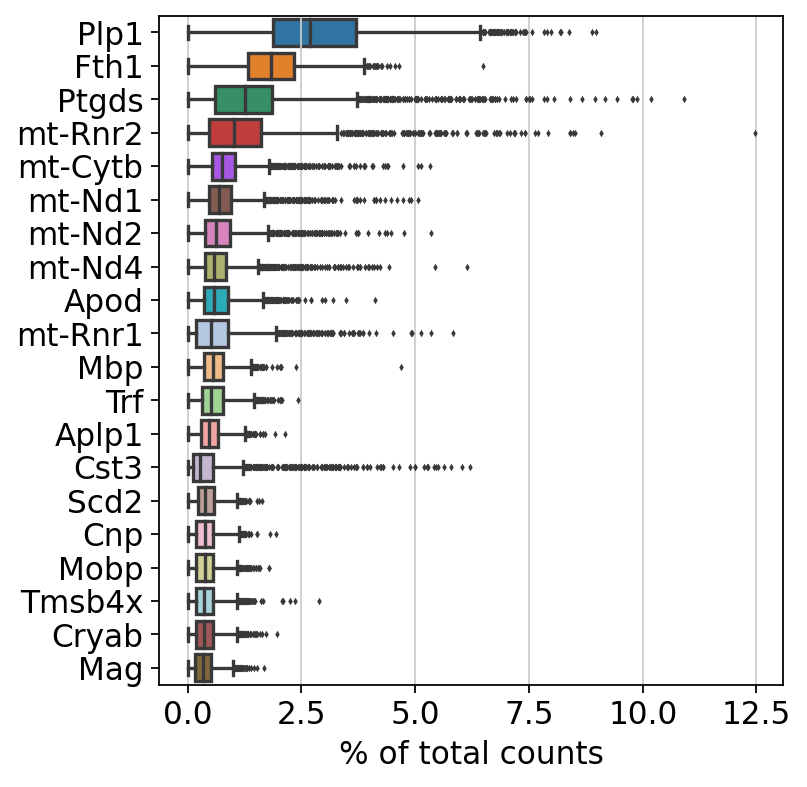

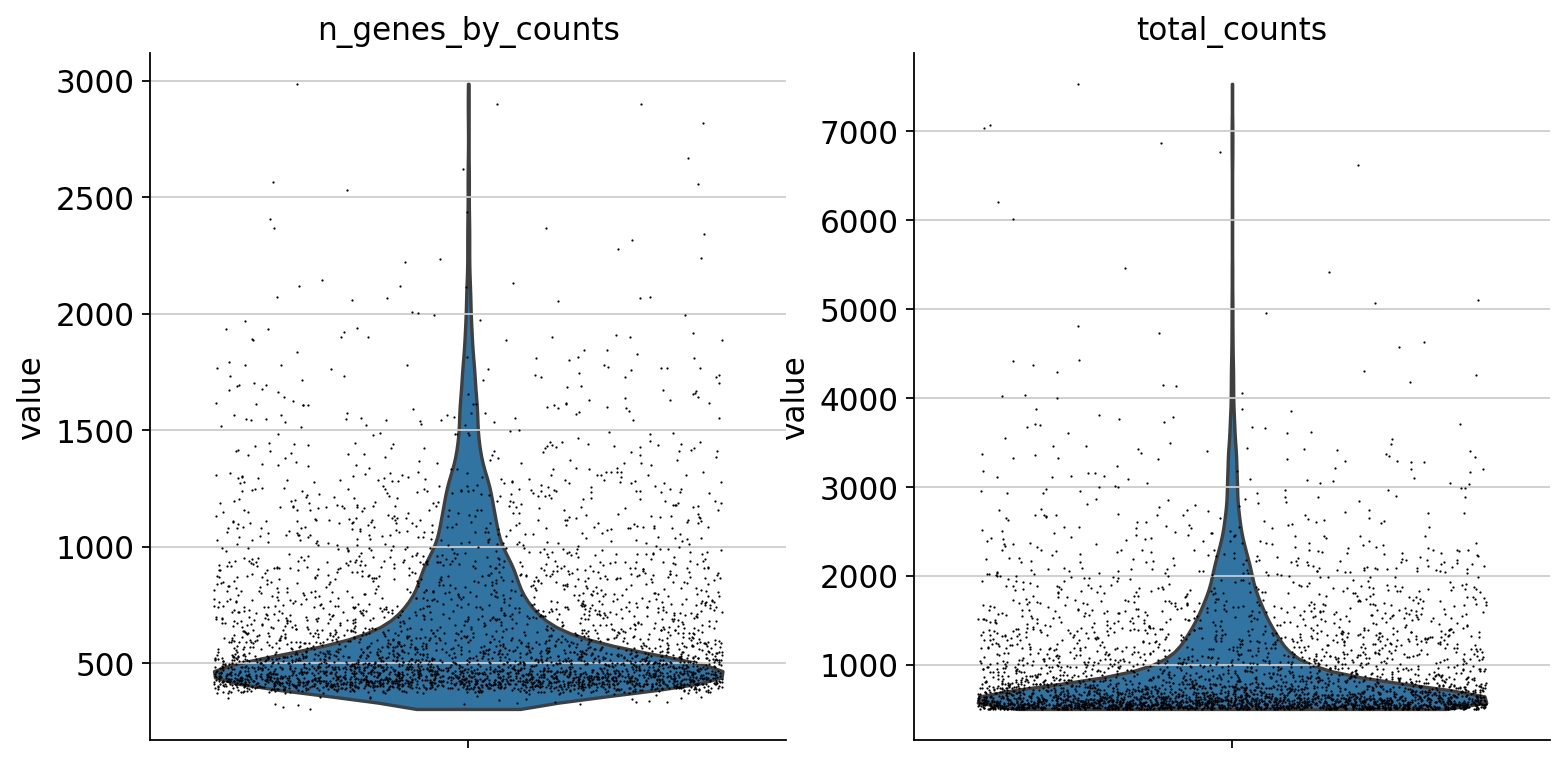

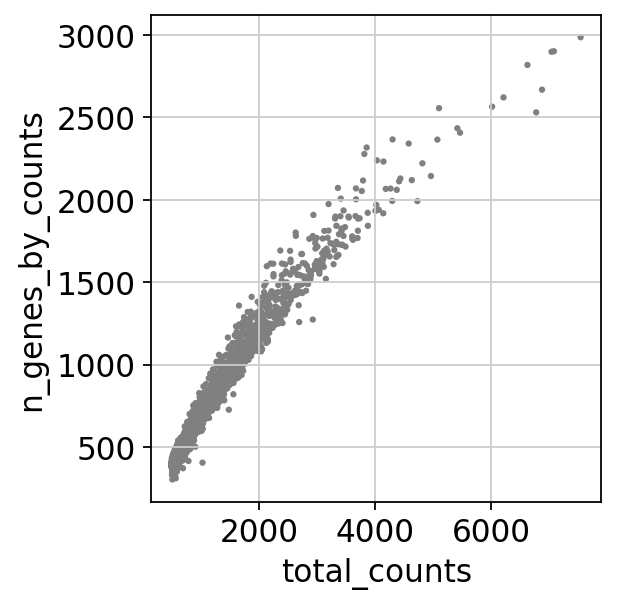

filtered out 9245 genes that are detected in less than 20 cells
normalizing counts per cell
    finished (0:00:00)


/home/ec2-user/miniconda3/envs/glial_origins/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


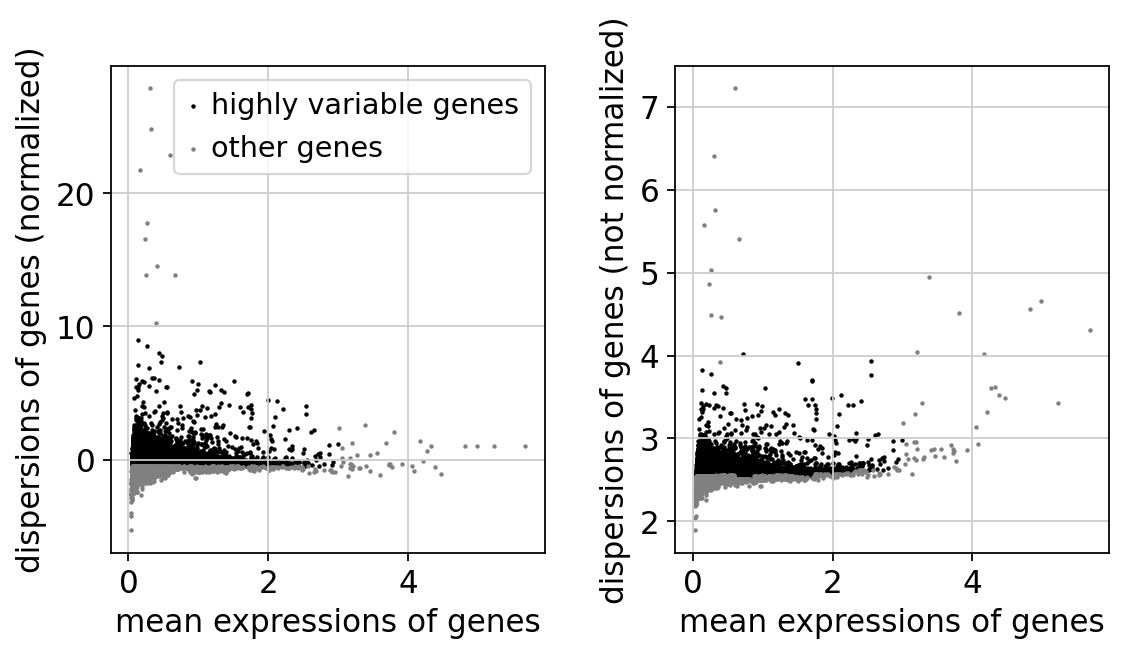

regressing out ['total_counts']
    finished (0:00:30)


In [18]:
sc.pl.highest_expr_genes(scanpy_data.adata, n_top=20, )
scanpy_data.violin()
scanpy_data.cellgene_filter(min_genes=100, min_cells=20)
scanpy_data.normalize(max_n_genes_by_counts = 7000, target_sum = 1e4)
scanpy_data.variable_filter(min_mean = 0.0125, max_mean = 3, min_disp = -0.5, max_disp = 10)
scanpy_data.regress_scale(how = ['total_counts'], max_value = 10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


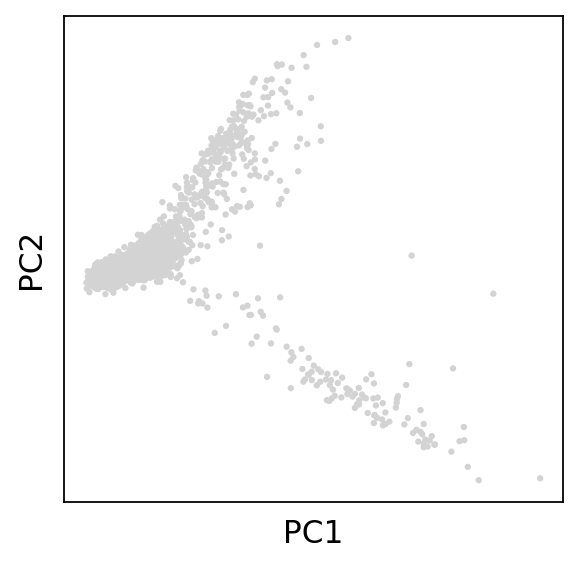

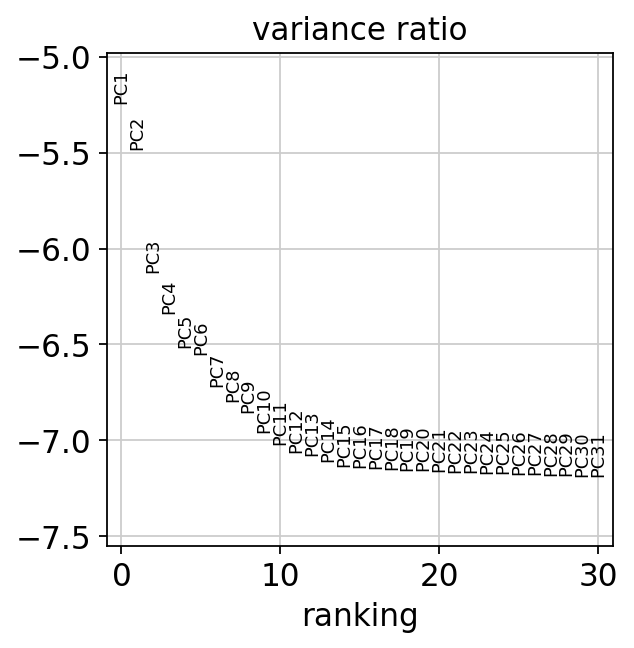

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


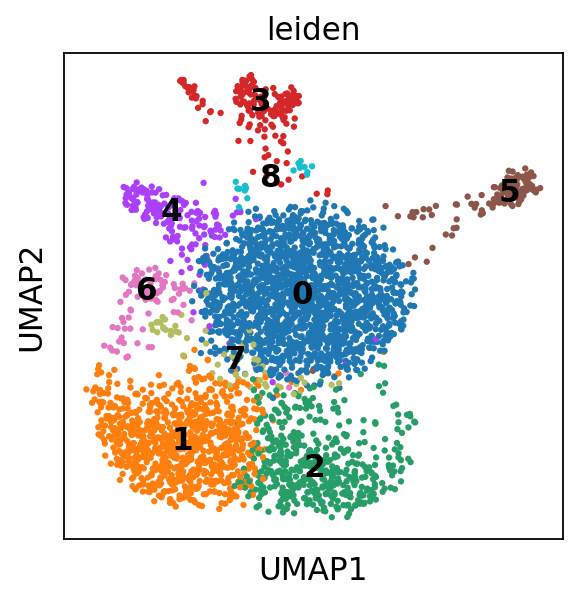

In [19]:
scanpy_data.pca_basic()
scanpy_data.umap_leiden()

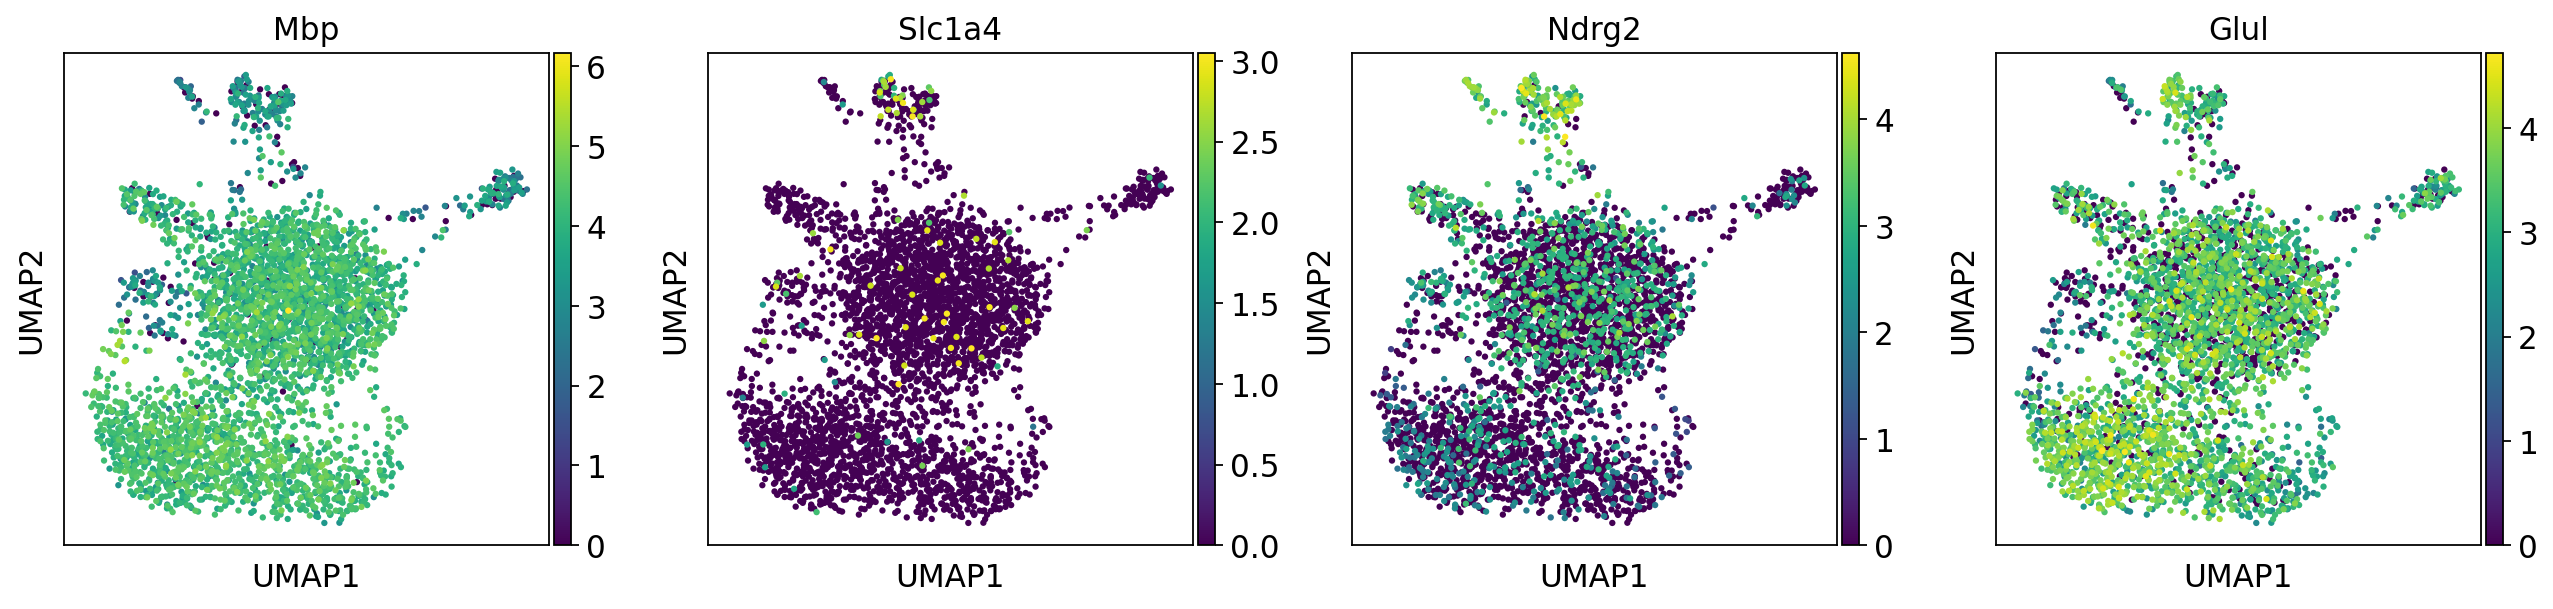

In [20]:
glial_markers = ['Mbp', 'Slc1a4', 'Ndrg2', 'Glul']
sc.pl.umap(scanpy_data.adata, color=glial_markers)

In [21]:
orthogroup_data = ScanpyMetaObject(
    matrix = species_BioFileDocket.Orthogroup_exc,
    sampledict = species_SampleDict
    )
orthogroup_data.read()

... writing an h5ad cache file to speedup reading next time


normalizing counts per cell
    finished (0:00:00)


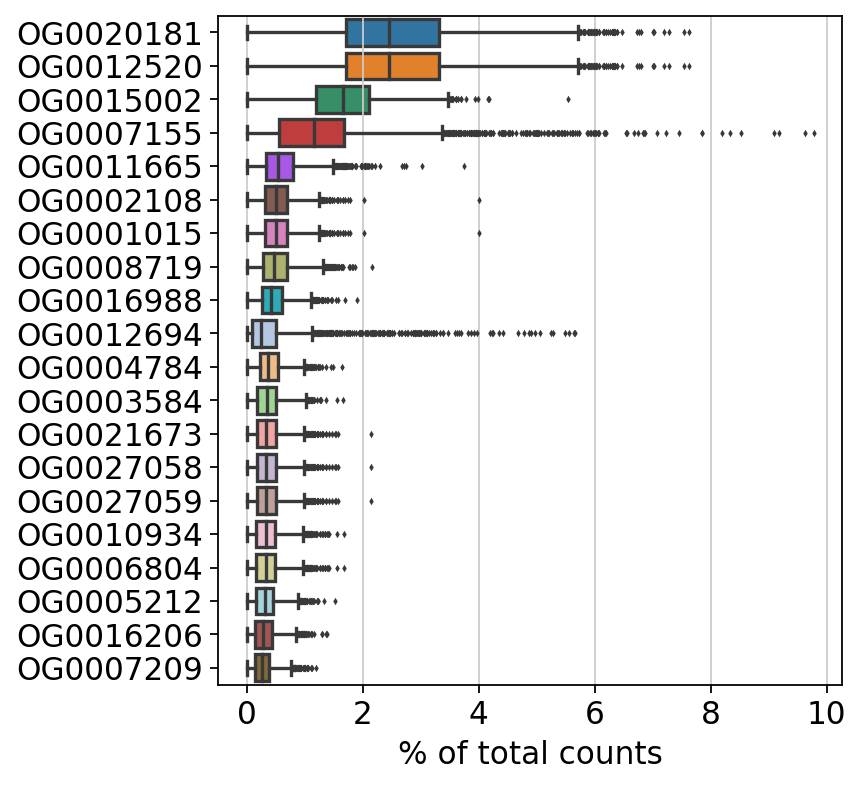

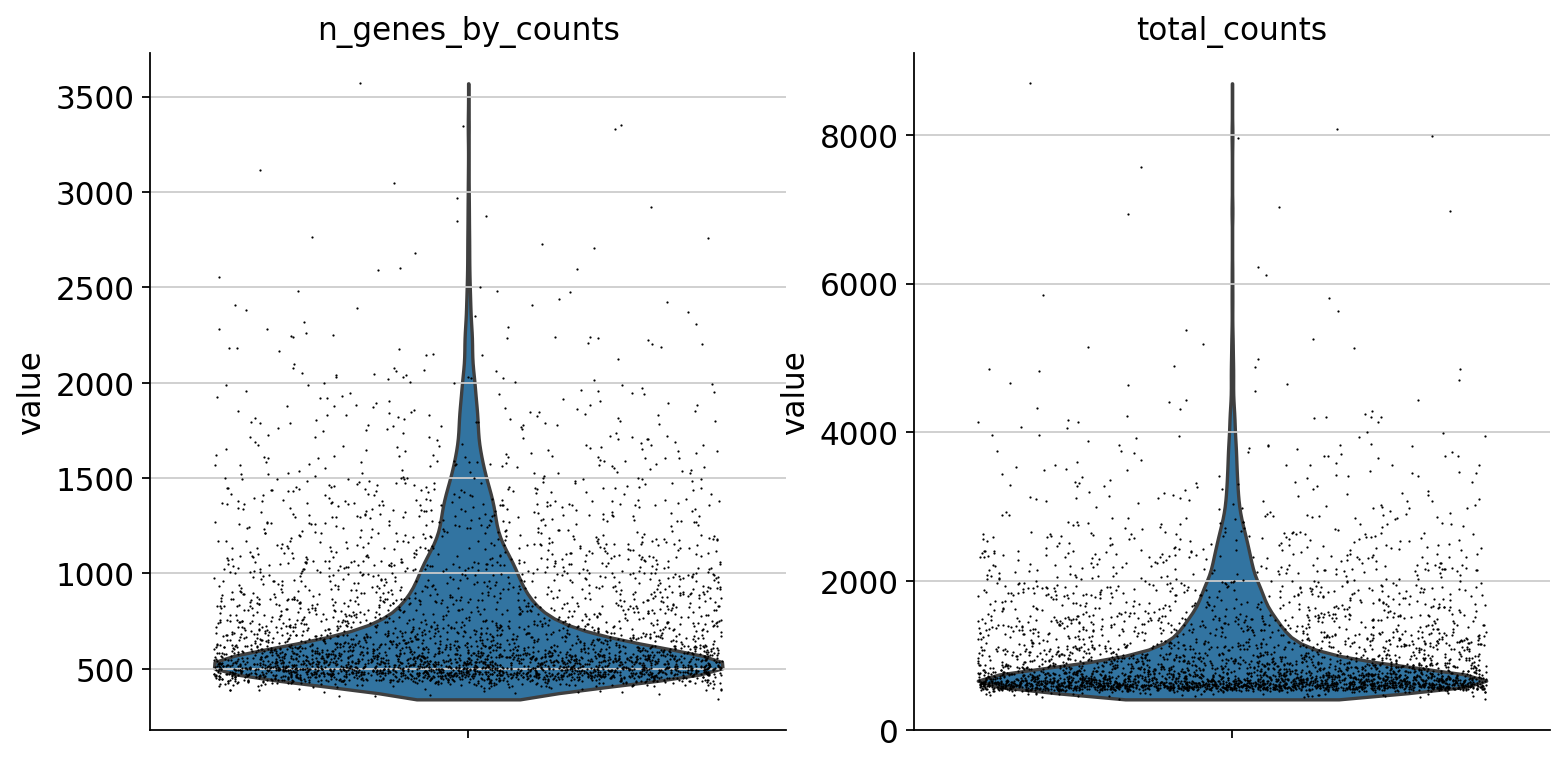

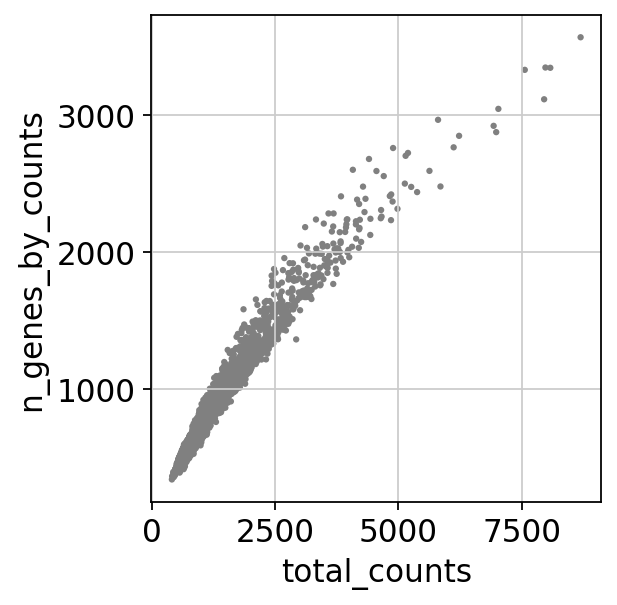

filtered out 5304 genes that are detected in less than 20 cells
normalizing counts per cell


/home/ec2-user/miniconda3/envs/glial_origins/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/ec2-user/miniconda3/envs/glial_origins/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:237: RuntimeWarning: invalid value encountered in true_divide
  df['dispersions_norm'] = (


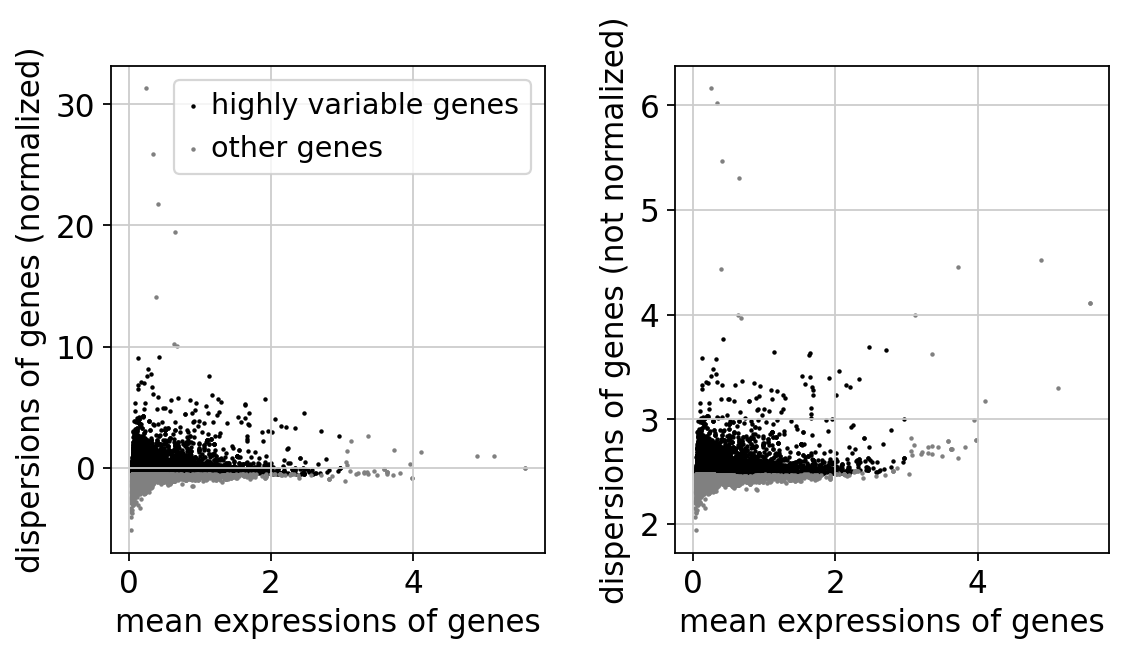

regressing out ['total_counts']
    finished (0:00:34)


In [22]:
sc.pl.highest_expr_genes(orthogroup_data.adata, n_top=20, )
orthogroup_data.violin()
orthogroup_data.cellgene_filter(min_genes=100, min_cells=20)
orthogroup_data.normalize(max_n_genes_by_counts = 7000, target_sum = 1e4)
orthogroup_data.variable_filter(min_mean = 0.0125, max_mean = 3, min_disp = -0.5, max_disp = 10)
orthogroup_data.regress_scale(how = ['total_counts'], max_value = 10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


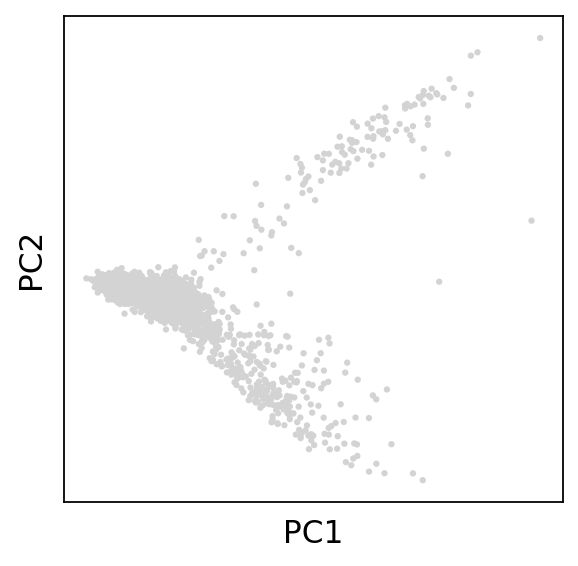

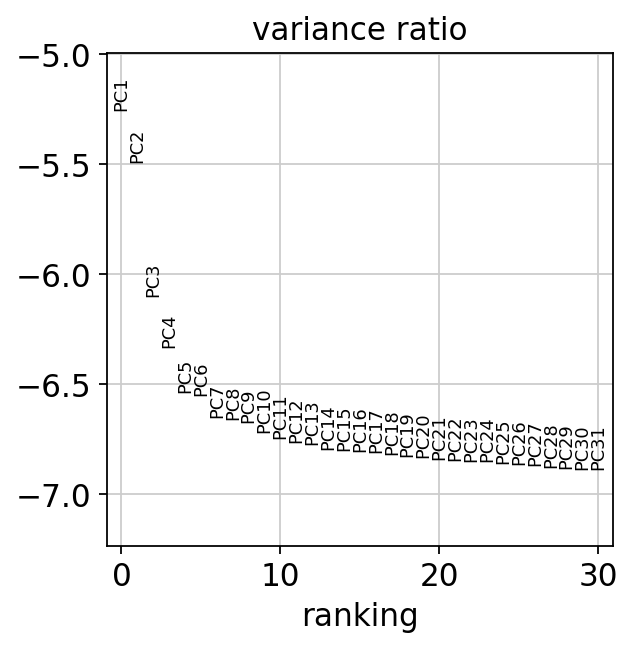

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)
running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


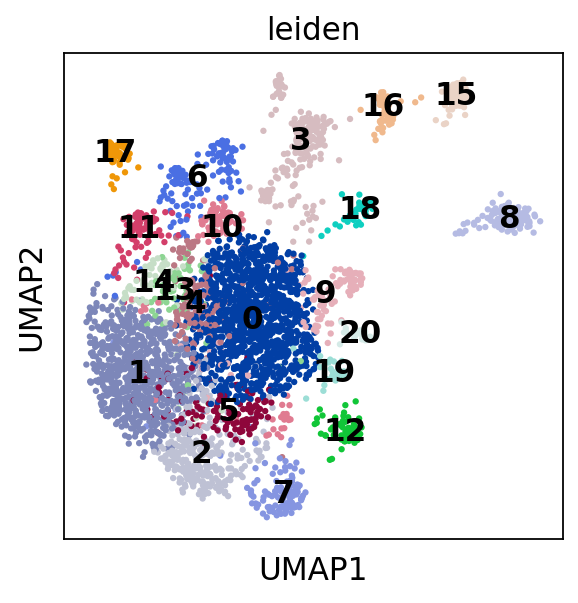

In [23]:
orthogroup_data.pca_basic()
orthogroup_data.umap_leiden()

In [24]:
idmm = pd.read_csv(species_BioFileDocket.og_idmm.path, sep = '\t')
display(idmm)

,gene_name,gene_id,transcript_id,protein_id,Orthogroup
0,Xkr4,gene0,rna0,rna0.p1,OG0007651
1,Xkr4,gene0,rna1,rna1.p1,OG0007651
2,Xkr4,gene0,rna2,rna2.p1,OG0007651
3,Xkr4,gene0,rna3,rna3.p1,OG0007651
4,LOC105242467,gene5,rna6,rna6.p1,OG0021742
...,...,...,...,...,...
103237,Cbx7,gene48797,rna111555,rna111555.p1,OG0001869
103238,Cbx7,gene48797,rna111555,rna111555.p6,OG0003239
103239,Cbx7,gene48797,rna111556,rna111556.p2,OG0001869
103240,Cbx7,gene48797,rna111556,rna111556.p5,OG0003239


In [25]:
glial_hog = [idmm[idmm['gene_name'] == gene]['Orthogroup'].unique() for gene in glial_markers]
glial_hog = [j for i in glial_hog for j in i]
glial_hog = [i for i in glial_hog if i in list(orthogroup_data.adata.var.index)]
display(glial_hog)

['OG0017731', 'OG0001055']

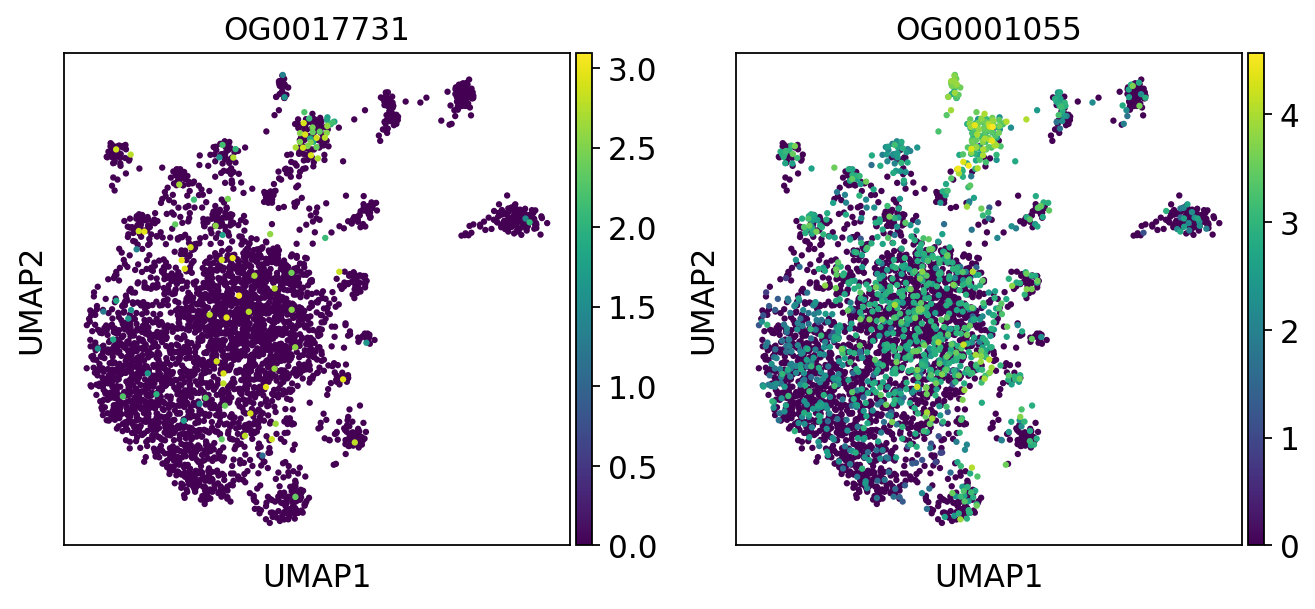

In [26]:
sc.pl.umap(orthogroup_data.adata, color=glial_hog)